<a href="https://colab.research.google.com/github/stepheodhiambo2000/Odhiambo_Machine_Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
## this sets some style parameters
sns.set()

## Read in the data and display a few rows
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


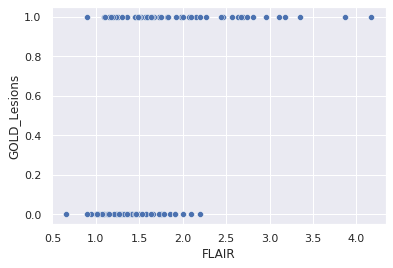

In [2]:
## Plot the data
sns.scatterplot('FLAIR', 'GOLD_Lesions', data = dat)

In [3]:
x = dat[['FLAIR']]
y = dat.GOLD_Lesions
trainFraction = .75

## Once again hold out some data
sample = np.random.uniform(size = 100) < trainFraction
xtrain = x[ sample]
ytrain = y[ sample]
xtest =  x[~sample]
ytest =  y[~sample]

In [4]:
lr = lm.LogisticRegression(fit_intercept=True, penalty='none')
fit = lr.fit(xtrain, ytrain)

In [5]:
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]

[-3.707822137252726, 2.3619364773956604]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


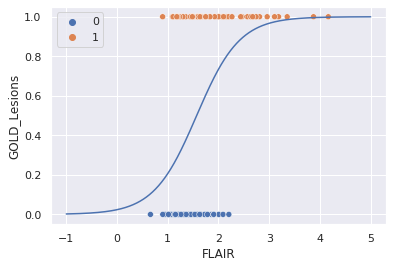

In [6]:
n = 1000
xplot = np.linspace(-1, 5, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

sns.scatterplot('FLAIR', 'GOLD_Lesions', data = dat, hue = 'GOLD_Lesions')
sns.lineplot(xplot, p)

## Of course, scikit has a predict
## function so that you don't have to do this manually
#yplot = fit.predict_proba(xplot.reshape((n, 1)))
#sns.lineplot(xplot, yplot[:, 1])

In [7]:
## This predicts the classes using a 50% probability cutoff
yhat_test = fit.predict(xtest)

## double checking that if you want
#all(yhat_test == (fit.predict_proba(xtest)[:, 1] > .5))

accuracy = np.mean(yhat_test == ytest)
sensitivity = np.mean(yhat_test[ytest == 1] == ytest[ytest == 1])
specificity = np.mean(yhat_test[ytest == 0] == ytest[ytest == 0])
np.round([accuracy, sensitivity, specificity], 3)

array([0.667, 0.727, 0.615])

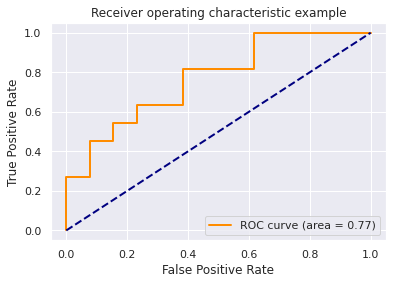

In [8]:
from sklearn.metrics import accuracy_score, roc_curve, auc

ptest = fit.predict_proba(xtest)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, ptest)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()